In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
dataset_path1 = "words_stream.txt"
counts_path2 = "counts.txt"
hash_path3 = "hash_params.txt"

In [24]:
#da1 = np.loadtxt(dataset_path1)

da2 = np.loadtxt(counts_path2)
#da2 = da2.astype(int)
da3 = np.loadtxt(hash_path3,dtype=int)
#da3 = da3.astype(int)

In [106]:
da2

array([[     1,  23963],
       [     2,   4073],
       [     3, 142857],
       ...,
       [139037,      1],
       [139038,      1],
       [139039,      1]])

In [4]:
da3

array([[   3, 1561],
       [  17,  277],
       [  38,  394],
       [  61,   13],
       [  78,  246]])

In [74]:
da2

array([[1.00000e+00, 2.39630e+04],
       [2.00000e+00, 4.07300e+03],
       [3.00000e+00, 1.42857e+05],
       ...,
       [1.39037e+05, 1.00000e+00],
       [1.39038e+05, 1.00000e+00],
       [1.39039e+05, 1.00000e+00]])

In [75]:
da3

array([[   3., 1561.],
       [  17.,  277.],
       [  38.,  394.],
       [  61.,   13.],
       [  78.,  246.]])

In [4]:
p= 123457

In [5]:
delta = math.exp(-5)

In [6]:
epsilon = math.exp(1)* math.pow(10,-4)

In [7]:
e = math.exp(1)

In [8]:
import math

buckets = math.ceil(e/epsilon)


In [98]:
buckets

10000

In [108]:
da2[1]

array([   2, 4073])

In [109]:
da2[1][0]

2

In [9]:
def hash(a, b, p, buckets, x):
    y = x%p
    hash_val = (a*y+b)%p
    ku = hash_val%buckets
    return ku

In [122]:
da3
    

array([[   3, 1561],
       [  17,  277],
       [  38,  394],
       [  61,   13],
       [  78,  246]])

In [10]:
matrix = np.zeros((5,buckets-1))

In [100]:
matrix.shape

(5, 9999)

In [11]:
f = open(dataset_path1 , "r")
for s in f:
    test = []
    x = int(s)
    for i  in da3:
        a = i[0]
        b = i[1]
        test.append(hash(a, b, p, buckets, x))
    for k in test:
        s1 = test.index(k)
        matrix[s1][k-1] += 1

In [48]:
err_values = []
real_values = []
pred_values =[]
#approximate_value = 0
for x in da2:
    approximate_value=0
    #err =0
    test1 = []
    test2 = []
    number = int(x[0])
    real_count = int(x[1])
    for i in da3:
        a = i[0]
        b = i[1]
        test1.append(hash(a,b,p,buckets,number))
    for i in test1:
        inde = test1.index(i)
        test2.append(matrix[inde][i-1])
    approxmiate_value = min(test2)
    
    #print(err)
    real_values.append(int(real_count))
    pred_values.append(approxmiate_value)
    

In [49]:
error_val=[]
for x in range(len(real_values)):
    error_val.append((int(pred_values[x])-real_values[x])/real_values[x])

Text(0.5, 1.0, 'log on error_value ')

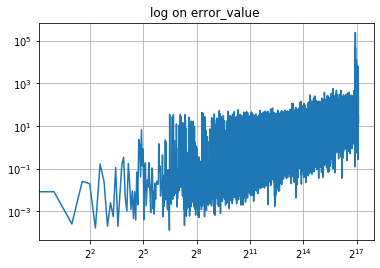

In [50]:

import matplotlib.pyplot as plt
plt.loglog(error_val, basex=2)
plt.grid(True)
plt.title('log on error_value ')

Text(0.5, 1.0, 'log on ground truth value f[i] ')

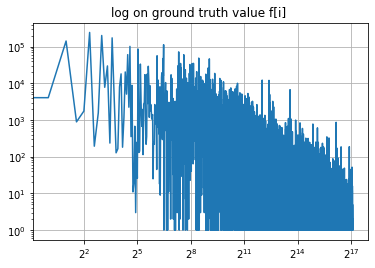

In [51]:
plt.loglog( real_values, basex=2)
plt.grid(True)
plt.title('log on ground truth value f[i] ')

Text(0.5, 1.0, 'log on predicted vlue ')

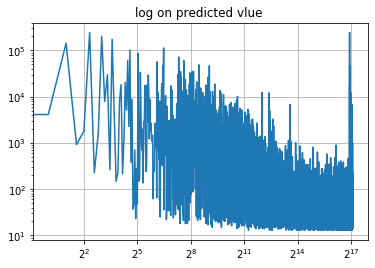

In [52]:
plt.loglog( pred_values, basex=2)
plt.grid(True)
plt.title('log on predicted vlue ')